# Autograd

In [1]:
import torch

In [8]:
# tensorを作成し、requires_grad=Tureを設定して演算を追跡
x = torch.ones(2, 2, requires_grad=True)

# ternsorに対する操作
y = x + 2
z = y * y * 3
out = z.mean()

In [9]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [10]:
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [11]:
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

In [12]:
out

tensor(27., grad_fn=<MeanBackward0>)

In [13]:
# 勾配を計算
out.backward()

# 勾配 d(out)/dx を出力
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# Autograd

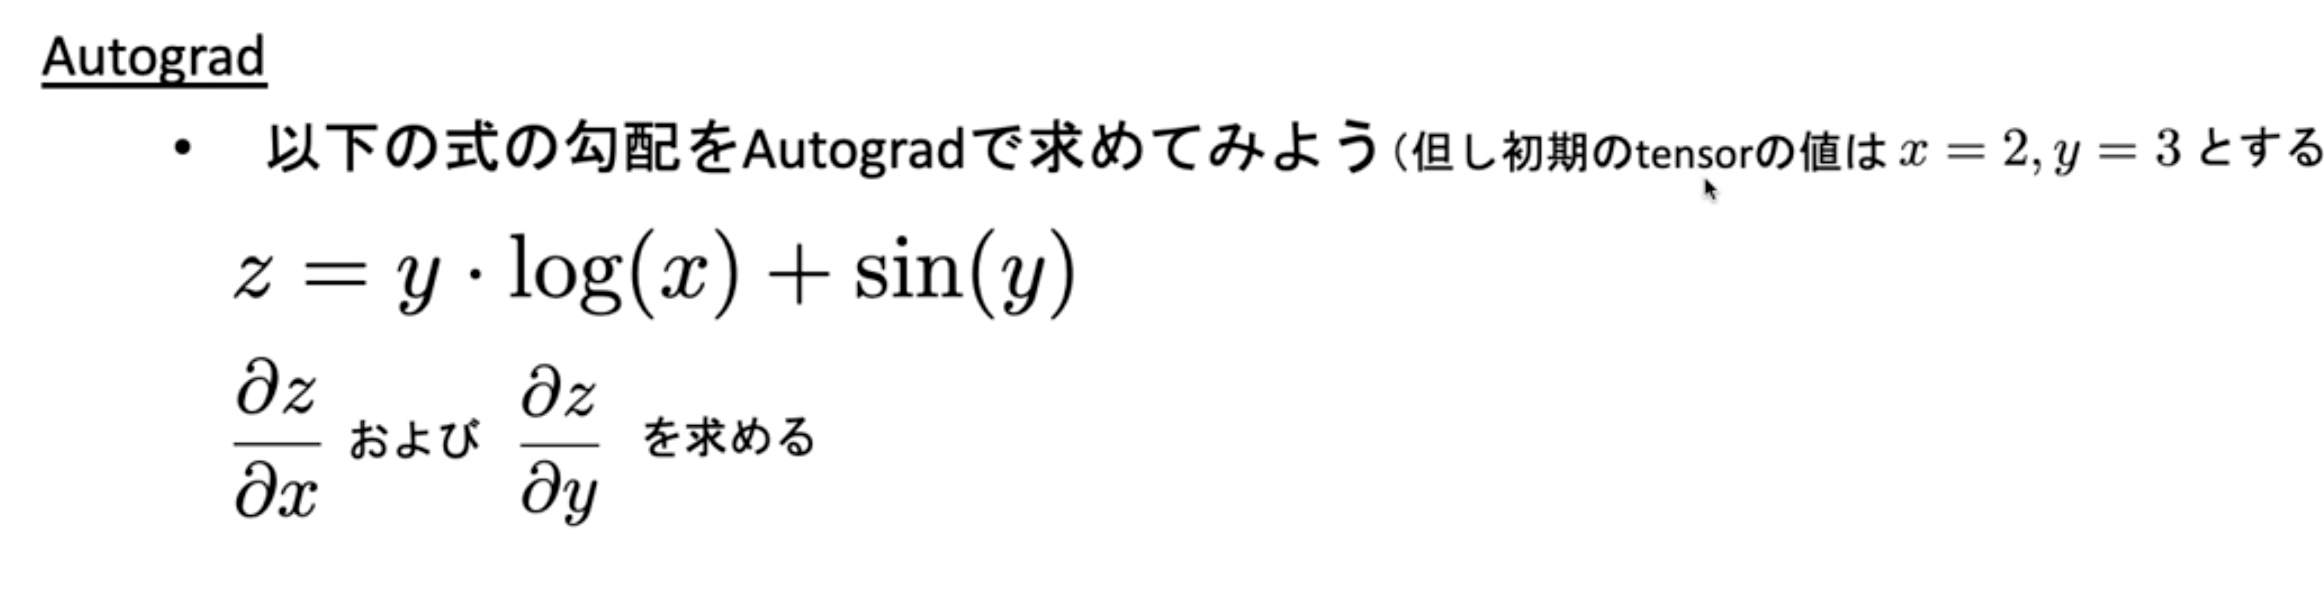

In [14]:
# xとyの値を設定し、requires_grad=Trueで微分可能にする
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

z = y * torch.log(x) + torch.sin(y)

# zに対して微分を計算
z.backward()

# 偏微分 dz/dy と dz/dx を取得
dz_dx = x.grad
dz_dy = y.grad

print("dz/dx:", dz_dx) # y/xと同じ
print("dz/dy:", dz_dy) # torch.log(x) + torch.cos(y)と同じ

dz/dx: tensor(1.5000)
dz/dy: tensor(-0.2968)


# 中間ノードの勾配

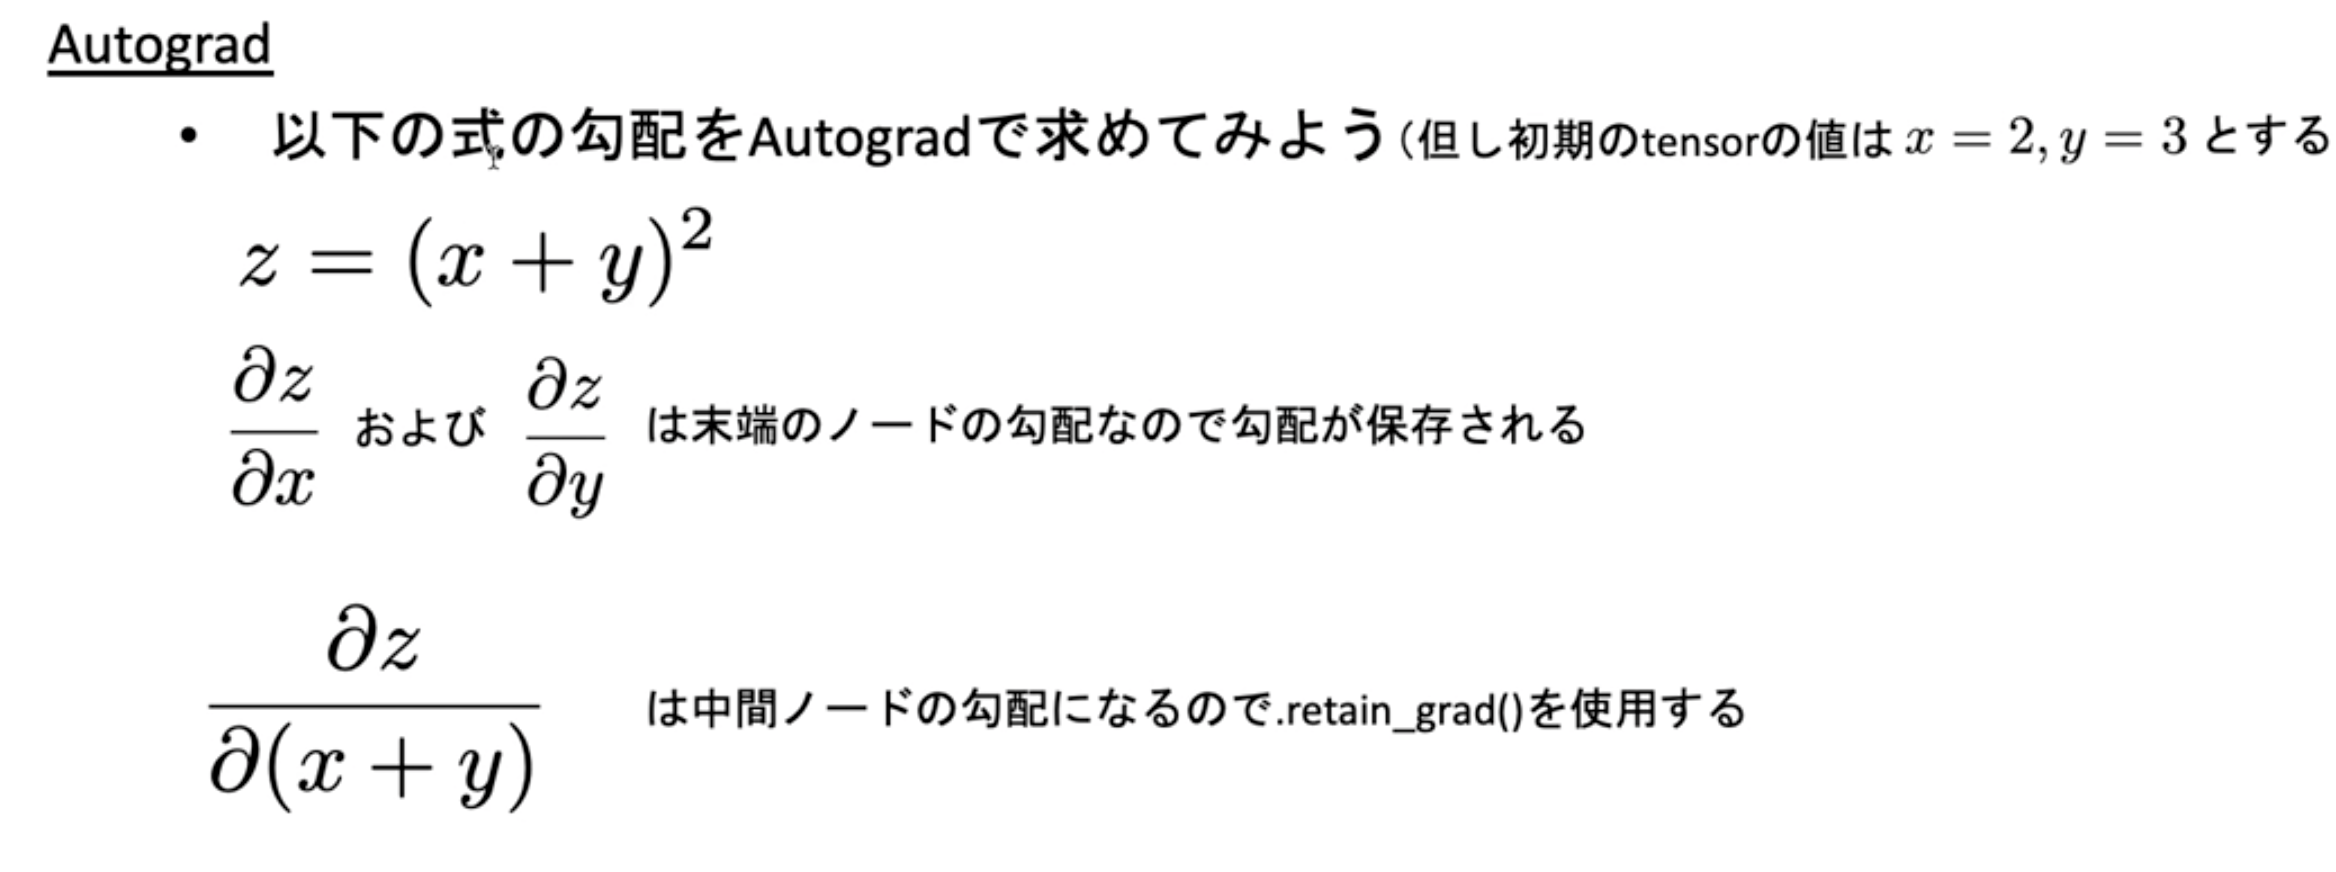

In [48]:
# 入力変数
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

# 中間ノード（合計）
sum_xy = x + y
sum_xy.retain_grad()  # この中間ノードの勾配を保存するためにretain_grad()を使用

# 出力関数
z = sum_xy ** 2

# 勾配を計算
z.backward()

# 各変数の勾配を表示
print("df/dx:", x.grad.item())
print("df/dy:", y.grad.item())
print("df/d(sum_xy):", sum_xy.grad.item())  # 中間ノードの勾配

df/dx: 10.0
df/dy: 10.0
df/d(sum_xy): 10.0


In [30]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
sum_xy = x + y

sum_xy

tensor(5., grad_fn=<AddBackward0>)

In [31]:
# sum_xyは中間ノードなので普通は保持されない
# sum_xyの勾配を保持するためには、.retain_grad() を使用する
sum_xy.retain_grad()

In [32]:
sum_xy

tensor(5., grad_fn=<AddBackward0>)

In [34]:
z = sum_xy ** 2

In [35]:
z.backward()

In [37]:
x.grad

tensor(10.)

In [39]:
y.grad

tensor(10.)

In [40]:
sum_xy.grad

tensor(10.)

# 自動微分を無効化

- torch.no_grad()
    - Autogradで勾配を保持するには計算グラフを構築するため、計算量が高くなりメモリ使用量も増える
    - 勾配を計算する必要がない場合は、with torch.no_grad(): を使って勾配を計算しないようにする
        - 計算速度が向上し、メモリ使用量が減る
        - モデルの推論(予測)時やパラメータの更新時に使用する

In [49]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

with torch.no_grad():
    z1 = y * torch.log(x) + torch.sin(y)

z2 = y * torch.log(x) + torch.sin(y)

# 逆伝播
# 以下はエラー．with torch.no_grad()内の計算では勾配は保持されない
# z1.backward()
z2.backward()

# 勾配が計算されていることを確認
print(y.grad)

tensor(-0.2968)


In [43]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

# Autogradを無効化したz1
with torch.no_grad():
    z1 = y * torch.log(x) + torch.sin(y)
# 無効化していないz2
z2 = y * torch.log(x) + torch.sin(y)

# z1.backward() を実行するとエラーになる
# z1.backward()
z2.backward()

In [45]:
x.grad

tensor(1.5000)

In [46]:
y.grad

tensor(-0.2968)